In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['fivethirtyeight'])

# Load data

In [159]:
pop_const = 314
video_df = pd.read_csv('videodata.txt', delim_whitespace=True)

# Scenario 1 (point estimate, interval estimate [gamer/non gamer])

In [160]:
v_df_nongamer = video_df[video_df['time'] == 0.0]
v_df_gamer = video_df[video_df['time'] != 0.0]

xbar = len(v_df_gamer) / len(video_df)

stderr = np.sqrt(xbar * (1 - xbar)) / np.sqrt(len(video_df) - 1)
stderr *= np.sqrt(pop_const - len(video_df)) / np.sqrt(pop_const)
ie_gamer = (xbar - (1.96 * stderr), xbar + (1.96 * stderr))

In [161]:
print("point estimate:", xbar)
print("interval estimate:", ie_gamer)

point estimate: 0.37362637362637363
interval estimate: (0.28939809634670244, 0.4578546509060448)


# Scenario 2 TODO make non-log plot, log box plot, non-log box plot

In [162]:
video_daily_df = video_df[video_df['freq'] == 1]
mean_vid_daily = np.mean(video_daily_df['time'])
std_vid_daily = np.std(video_daily_df['time'])

video_weekly_df = video_df[video_df['freq'] == 2]
mean_vid_weekly = np.mean(video_weekly_df['time'])
std_vid_weekly = np.std(video_weekly_df['time'])

video_monthly_df = video_df[video_df['freq'] == 3]
mean_vid_monthly = np.mean(video_monthly_df['time'])
std_vid_monthly = np.std(video_monthly_df['time'])

video_semesterly_df = video_df[video_df['freq'] == 4]
mean_vid_semesterly = np.mean(video_semesterly_df['time'])
std_vid_semesterly = np.std(video_semesterly_df['time'])

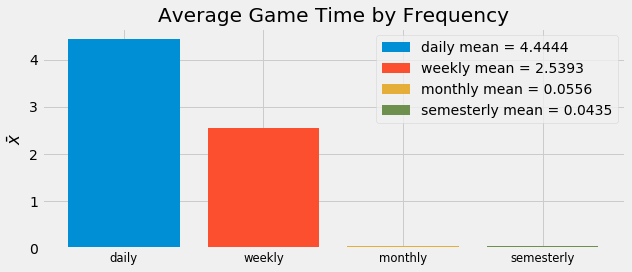

In [163]:
plt.figure(figsize=(9,4))

means = [mean_vid_daily, mean_vid_weekly, mean_vid_monthly, mean_vid_semesterly]
labels = ['daily', 'weekly', 'monthly', 'semesterly']

for i in range(4):
    plt.bar([i], 
            height=[means[i]], 
            label='{} mean = {:.4f}'.format(labels[i], means[i]), 
            log=False,)
            #yerr=[std_vid_daily, std_vid_weekly, std_vid_monthly, std_vid_semesterly])
    
plt.xticks([0,1,2,3], labels, size='small')
plt.ylabel(r'$\bar{x}$')
plt.title('Average Game Time by Frequency')
plt.legend()


plt.tight_layout()
plt.savefig('s2.png', dpi=420, )

plt.show()

/Users/nicholasroberts/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


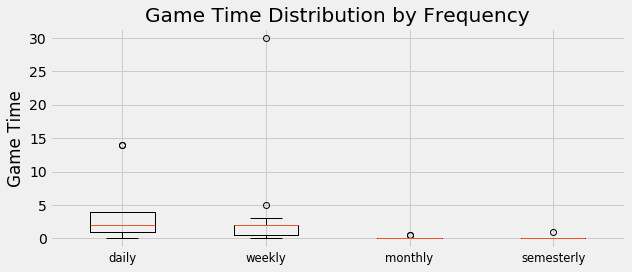

In [164]:
plt.figure(figsize=(9,4))

plt.boxplot([video_daily_df['time'], 
             video_weekly_df['time'], 
             video_monthly_df['time'], 
             video_semesterly_df['time']])

plt.xticks([1,2,3,4], labels, size='small')
plt.ylabel('Game Time')
#plt.yscale('log')
plt.title('Game Time Distribution by Frequency')
plt.legend()


plt.tight_layout()
plt.savefig('s2-box.png', dpi=420, )


plt.show()

# Scenario 3 (normality assumption incoming)

In [165]:
xbar_time = np.mean(video_df['time'])
std_time = np.std(video_df['time'])
err_time = xbar_time / np.sqrt(len(video_df['time']))
ie_time = (xbar_time - err_time, xbar_time + err_time)

print("point estimate:", xbar_time)
print("interval estimate:", ie_time)

point estimate: 1.2428571428571429
interval estimate: (1.1125703131502758, 1.37314397256401)


# Scenario 4

In [166]:
num_np = len(video_df[video_df['like'] == 1])
num_vm = len(video_df[video_df['like'] == 2])
num_some = len(video_df[video_df['like'] == 3])
num_nr = len(video_df[video_df['like'] == 4])
num_naa = len(video_df[video_df['like'] == 5])

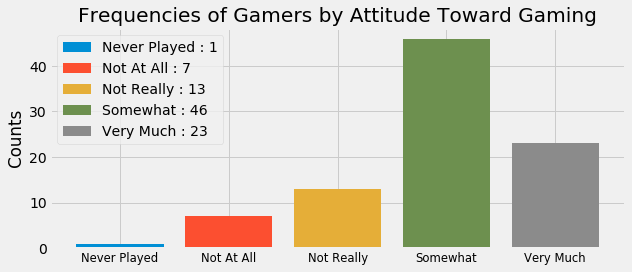

In [167]:
plt.figure(figsize=(9,4))

counts = list(reversed([num_vm, num_some, num_nr, num_naa, num_np]))
labels = list(reversed(['Very Much', 'Somewhat', 'Not Really', 'Not At All', 'Never Played']))

for i in range(5):
    plt.bar([i], 
            height=[counts[i]], 
            label='{} : {}'.format(labels[i], counts[i]), 
            log=False,)
    
plt.xticks([0,1,2,3,4], labels, size='small')
plt.ylabel('Counts')
plt.title('Frequencies of Gamers by Attitude Toward Gaming')
plt.legend()


plt.tight_layout()
plt.savefig('s4.png', dpi=420, )

plt.show()

# Scenario 5

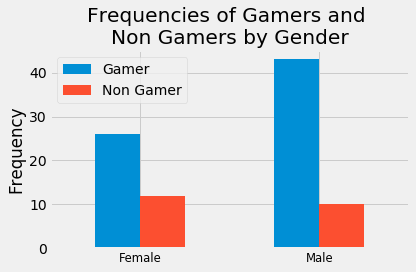

In [168]:
def isgamer(row):
    isg = int((row['like'] == 2) | (row['like'] == 3))
    
    if isg:
        return 'Gamer'
    return 'Non Gamer'

def gender(row):
    isg = int(row['sex'] == 1)
    
    if isg:
        return 'Male'
    return 'Female'

video_df['isgamer'] = video_df.apply(lambda row: isgamer(row), axis=1)
video_df['gender'] = video_df.apply(lambda row: gender(row), axis=1)


video_df[['isgamer', 'sex']].pivot_table(index='sex',
               columns='isgamer',
               aggfunc=len,
               fill_value=0).plot(kind='bar')

plt.xticks([0, 1], ['Female', 'Male'], size='small', rotation=0)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequencies of Gamers and \nNon Gamers by Gender')
plt.legend()

plt.tight_layout()
plt.savefig('s5-1.png', dpi=420, )

plt.show()

In [169]:
video_df[['isgamer', 'gender']].pivot_table(index='gender',
               columns='isgamer',
               aggfunc=len,
               fill_value=0)

isgamer,Gamer,Non Gamer
gender,,
Female,26,12
Male,43,10


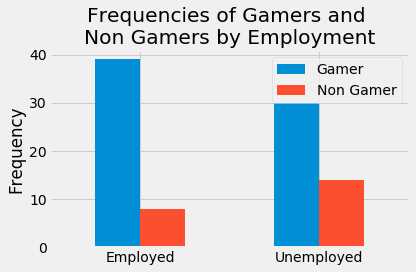

In [170]:
def isemployed(row):
    ise = row['work'] != 0
    
    if ise:
        return 'Employed'
    return 'Unemployed'

video_df['employed'] = video_df.apply(lambda row: isemployed(row), axis=1)

video_df[['isgamer', 'employed']].pivot_table(index='employed',
               columns='isgamer',
               aggfunc=len,
               fill_value=0).plot(kind='bar')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequencies of Gamers and \nNon Gamers by Employment')
plt.legend()

plt.tight_layout()
plt.savefig('s5-2.png', dpi=420, )

plt.show()

In [171]:
video_df[['isgamer', 'employed']].pivot_table(index='employed',
               columns='isgamer',
               aggfunc=len,
               fill_value=0)

isgamer,Gamer,Non Gamer
employed,,
Employed,39,8
Unemployed,30,14


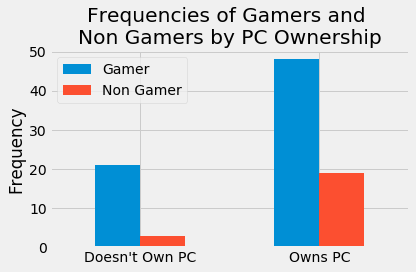

In [172]:
def owncomp(row):
    ownc = row['own'] == 1
    
    if ownc:
        return 'Owns PC'
    return 'Doesn\'t Own PC'

video_df['ownpc'] = video_df.apply(lambda row: owncomp(row), axis=1)

video_df[['isgamer', 'ownpc']].pivot_table(index='ownpc',
               columns='isgamer',
               aggfunc=len,
               fill_value=0).plot(kind='bar')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequencies of Gamers and \nNon Gamers by PC Ownership')
plt.legend()

plt.tight_layout()
plt.savefig('s5-3.png', dpi=420, )

plt.show()

In [173]:
video_df[['isgamer', 'ownpc']].pivot_table(index='ownpc',
               columns='isgamer',
               aggfunc=len,
               fill_value=0)

isgamer,Gamer,Non Gamer
ownpc,,
Doesn't Own PC,21,3
Owns PC,48,19


# Our OWN question

In [174]:
videomult_df = pd.read_csv('videoMultiple.txt', delim_whitespace=True)
videoall_df = pd.concat([videomult_df, video_df], axis=1)
videoall_df.columns

Index(['action', 'adv', 'sim', 'sport', 'strategy', 'relax', 'coord',
       'challenge', 'master', 'bored', 'other', 'graphic', 'time', 'frust',
       'lonely', 'rules', 'cost', 'boring', 'friends', 'point', 'other2',
       'time', 'like', 'where', 'freq', 'busy', 'educ', 'sex', 'age', 'home',
       'math', 'work', 'own', 'cdrom', 'email', 'grade', 'isgamer', 'gender',
       'employed', 'ownpc'],
      dtype='object')

In [175]:
videoall_df[['action', 'adv', 'sim', 'sport', 'strategy', ]].pivot_table(index='ownpc',
               columns='isgamer',
               aggfunc=len,
               fill_value=0)

KeyError: 'ownpc'

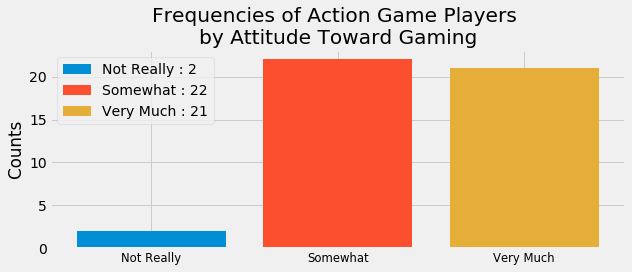

In [176]:
num_np = len(videoall_df[(videoall_df['like'] == 1) & (videoall_df['action'] == 1)])
num_vm = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['action'] == 1)])
num_some = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['action'] == 1)])
num_nr = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['action'] == 1)])
num_naa = len(videoall_df[(videoall_df['like'] == 5) & (videoall_df['action'] == 1)])

plt.figure(figsize=(9,4))

counts = list(reversed([num_vm, num_some, num_nr, num_naa, num_np]))
labels = list(reversed(['Very Much', 'Somewhat', 'Not Really', 'Not At All', 'Never Played']))

for i in range(2, 5):
    plt.bar([i], 
            height=[counts[i]], 
            label='{} : {}'.format(labels[i], counts[i]), 
            log=False,)
    
plt.xticks([0,1,2,3,4][2:5], labels[2:5], size='small')
plt.ylabel('Counts')
plt.title('Frequencies of Action Game Players \nby Attitude Toward Gaming')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_action.png', dpi=420, )

plt.show()

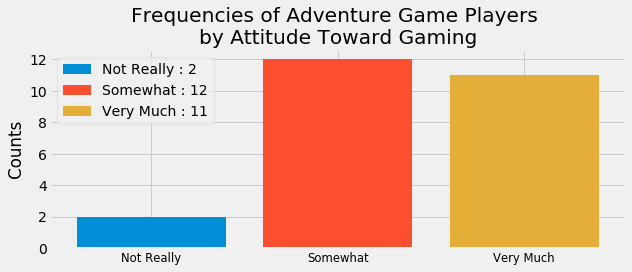

In [177]:
num_np = len(videoall_df[(videoall_df['like'] == 1) & (videoall_df['adv'] == 1)])
num_vm = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['adv'] == 1)])
num_some = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['adv'] == 1)])
num_nr = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['adv'] == 1)])
num_naa = len(videoall_df[(videoall_df['like'] == 5) & (videoall_df['adv'] == 1)])

plt.figure(figsize=(9,4))

counts = list(reversed([num_vm, num_some, num_nr, num_naa, num_np]))
labels = list(reversed(['Very Much', 'Somewhat', 'Not Really', 'Not At All', 'Never Played']))

for i in range(2, 5):
    plt.bar([i], 
            height=[counts[i]], 
            label='{} : {}'.format(labels[i], counts[i]), 
            log=False,)
    
plt.xticks([0,1,2,3,4][2:5], labels[2:5], size='small')
plt.ylabel('Counts')
plt.title('Frequencies of Adventure Game Players \nby Attitude Toward Gaming')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_adv.png', dpi=420, )

plt.show()

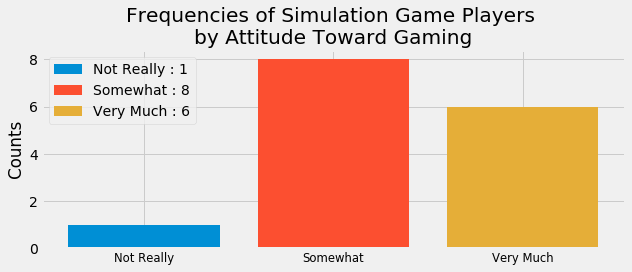

In [178]:
num_np = len(videoall_df[(videoall_df['like'] == 1) & (videoall_df['sim'] == 1)])
num_vm = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['sim'] == 1)])
num_some = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['sim'] == 1)])
num_nr = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['sim'] == 1)])
num_naa = len(videoall_df[(videoall_df['like'] == 5) & (videoall_df['sim'] == 1)])

plt.figure(figsize=(9,4))

counts = list(reversed([num_vm, num_some, num_nr, num_naa, num_np]))
labels = list(reversed(['Very Much', 'Somewhat', 'Not Really', 'Not At All', 'Never Played']))

for i in range(2, 5):
    plt.bar([i], 
            height=[counts[i]], 
            label='{} : {}'.format(labels[i], counts[i]), 
            log=False,)
    
plt.xticks([0,1,2,3,4][2:5], labels[2:5], size='small')
plt.ylabel('Counts')
plt.title('Frequencies of Simulation Game Players \nby Attitude Toward Gaming')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_sim.png', dpi=420, )

plt.show()

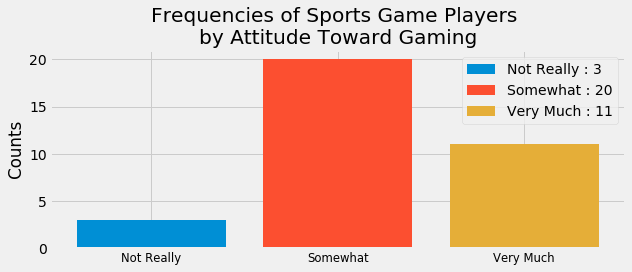

In [179]:
num_np = len(videoall_df[(videoall_df['like'] == 1) & (videoall_df['sport'] == 1)])
num_vm = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['sport'] == 1)])
num_some = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['sport'] == 1)])
num_nr = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['sport'] == 1)])
num_naa = len(videoall_df[(videoall_df['like'] == 5) & (videoall_df['sport'] == 1)])

plt.figure(figsize=(9,4))

counts = list(reversed([num_vm, num_some, num_nr, num_naa, num_np]))
labels = list(reversed(['Very Much', 'Somewhat', 'Not Really', 'Not At All', 'Never Played']))

for i in range(2, 5):
    plt.bar([i], 
            height=[counts[i]], 
            label='{} : {}'.format(labels[i], counts[i]), 
            log=False,)
    
plt.xticks([0,1,2,3,4][2:5], labels[2:5], size='small')
plt.ylabel('Counts')
plt.title('Frequencies of Sports Game Players \nby Attitude Toward Gaming')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_sport.png', dpi=420, )

plt.show()

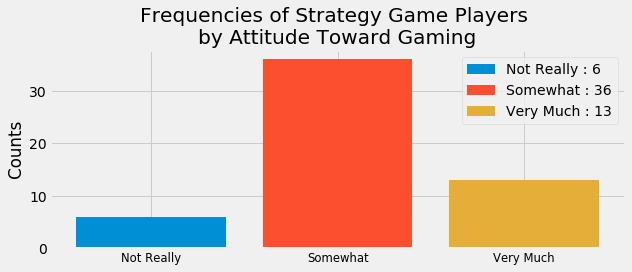

In [180]:
num_np = len(videoall_df[(videoall_df['like'] == 1) & (videoall_df['strategy'] == 1)])
num_vm = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['strategy'] == 1)])
num_some = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['strategy'] == 1)])
num_nr = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['strategy'] == 1)])
num_naa = len(videoall_df[(videoall_df['like'] == 5) & (videoall_df['strategy'] == 1)])

plt.figure(figsize=(9,4))

counts = list(reversed([num_vm, num_some, num_nr, num_naa, num_np]))
labels = list(reversed(['Very Much', 'Somewhat', 'Not Really', 'Not At All', 'Never Played']))

for i in range(2, 5):
    plt.bar([i], 
            height=[counts[i]], 
            label='{} : {}'.format(labels[i], counts[i]), 
            log=False,)
    
plt.xticks([0,1,2,3,4][2:5], labels[2:5], size='small')
plt.ylabel('Counts')
plt.title('Frequencies of Strategy Game Players \nby Attitude Toward Gaming')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_strategy.png', dpi=420, )

plt.show()

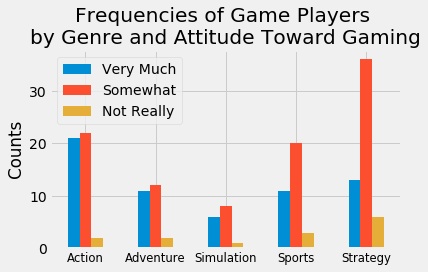

In [201]:
countsmat = np.zeros([5, 3])

countsmat[0, 0] = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['action'] == 1)])
countsmat[0, 1] = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['action'] == 1)])
countsmat[0, 2] = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['action'] == 1)])
countsmat[1, 0] = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['adv'] == 1)])
countsmat[1, 1] = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['adv'] == 1)])
countsmat[1, 2] = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['adv'] == 1)])
countsmat[2, 0] = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['sim'] == 1)])
countsmat[2, 1] = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['sim'] == 1)])
countsmat[2, 2] = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['sim'] == 1)])
countsmat[3, 0] = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['sport'] == 1)])
countsmat[3, 1] = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['sport'] == 1)])
countsmat[3, 2] = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['sport'] == 1)])
countsmat[4, 0] = len(videoall_df[(videoall_df['like'] == 2) & (videoall_df['strategy'] == 1)])
countsmat[4, 1] = len(videoall_df[(videoall_df['like'] == 3) & (videoall_df['strategy'] == 1)])
countsmat[4, 2] = len(videoall_df[(videoall_df['like'] == 4) & (videoall_df['strategy'] == 1)])

pd.DataFrame(countsmat, columns=['Very Much','Somewhat','Not Really']).plot(kind='bar')

plt.xticks([0,1,2,3,4], ['Action', 'Adventure', 'Simulation', 'Sports', 'Strategy'], size='small', rotation=0)
plt.ylabel('Counts')
plt.title('Frequencies of Game Players \nby Genre and Attitude Toward Gaming')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_genre.png', dpi=420, )

plt.show()

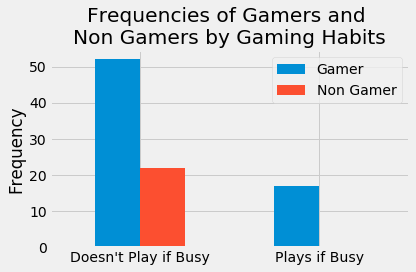

In [182]:
def playbusy(row):
    ownc = row['busy'] == 1
    
    if ownc:
        return 'Plays if Busy'
    return 'Doesn\'t Play if Busy'

video_df['playifbusystr'] = video_df.apply(lambda row: playbusy(row), axis=1)

video_df[['isgamer', 'playifbusystr']].pivot_table(index='playifbusystr',
               columns='isgamer',
               aggfunc=len,
               fill_value=0).plot(kind='bar')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequencies of Gamers and \nNon Gamers by Gaming Habits')
plt.legend()

plt.tight_layout()
plt.savefig('s2-2.png', dpi=420, )

plt.show()

In [183]:
ifbusy = video_df[['isgamer', 'playifbusystr']].pivot_table(index='playifbusystr',
               columns='isgamer',
               aggfunc=len,
               fill_value=0)

ifbusy

isgamer,Gamer,Non Gamer
playifbusystr,,
Doesn't Play if Busy,52,22
Plays if Busy,17,0


In [184]:
ifbusy / np.tile(np.sum(np.array(ifbusy), axis=1), (2, 1)).T

isgamer,Gamer,Non Gamer
playifbusystr,,
Doesn't Play if Busy,0.702703,0.297297
Plays if Busy,1.000000,0.000000


In [185]:
ifbusy / np.tile(np.sum(np.array(ifbusy), axis=0), (2, 1))

isgamer,Gamer,Non Gamer
playifbusystr,,
Doesn't Play if Busy,0.753623,1.0
Plays if Busy,0.246377,0.0


# Our own question

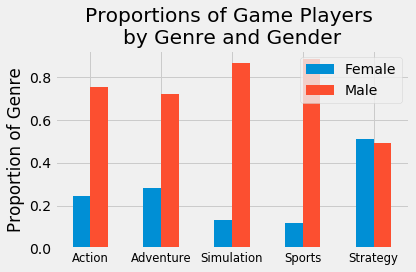

In [205]:
countsmat = np.zeros([5, 2])

countsmat[0, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['action'] == 1)])
countsmat[0, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['action'] == 1)])
countsmat[1, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['adv'] == 1)])
countsmat[1, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['adv'] == 1)])
countsmat[2, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['sim'] == 1)])
countsmat[2, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['sim'] == 1)])
countsmat[3, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['sport'] == 1)])
countsmat[3, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['sport'] == 1)])
countsmat[4, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['strategy'] == 1)])
countsmat[4, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['strategy'] == 1)])

# Normalize
countsmat /= np.tile(np.sum(countsmat, axis=1), (2,1)).T

pd.DataFrame(countsmat, columns=['Female','Male']).plot(kind='bar')

plt.xticks([0,1,2,3,4], ['Action', 'Adventure', 'Simulation', 'Sports', 'Strategy'], size='small', rotation=0)
plt.ylabel('Proportion of Genre')
plt.title('Proportions of Game Players \nby Genre and Gender')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_genre_gender.png', dpi=420, )

plt.show()

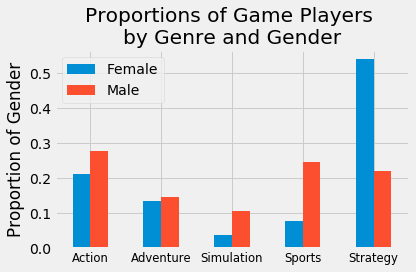

In [231]:
countsmat = np.zeros([5, 2])

countsmat[0, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['action'] == 1)])
countsmat[0, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['action'] == 1)])
countsmat[1, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['adv'] == 1)])
countsmat[1, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['adv'] == 1)])
countsmat[2, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['sim'] == 1)])
countsmat[2, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['sim'] == 1)])
countsmat[3, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['sport'] == 1)])
countsmat[3, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['sport'] == 1)])
countsmat[4, 0] = len(videoall_df[(videoall_df['gender'] == 'Female') & (videoall_df['strategy'] == 1)])
countsmat[4, 1] = len(videoall_df[(videoall_df['gender'] == 'Male') & (videoall_df['strategy'] == 1)])

# Normalize

countsmat /= np.tile(np.sum(countsmat, axis=0), (5,1))

pd.DataFrame(countsmat, columns=['Female','Male']).plot(kind='bar')

plt.xticks([0,1,2,3,4], ['Action', 'Adventure', 'Simulation', 'Sports', 'Strategy'], size='small', rotation=0)
plt.ylabel('Proportion of Gender')
plt.title('Proportions of Game Players \nby Genre and Gender')
plt.legend()


plt.tight_layout()
plt.savefig('s_own_genre_gender.png', dpi=420, )

plt.show()

In [187]:
video_daily_df = video_df[(video_df['freq'] == 1) & (video_df['busy'] == 0)]
mean_vid_daily = np.mean(video_daily_df['time'])
std_vid_daily = np.std(video_daily_df['time'])

video_weekly_df = video_df[(video_df['freq'] == 2) & (video_df['busy'] == 0)]
mean_vid_weekly = np.mean(video_weekly_df['time'])
std_vid_weekly = np.std(video_weekly_df['time'])

video_monthly_df = video_df[(video_df['freq'] == 3) & (video_df['busy'] == 0)]
mean_vid_monthly = np.mean(video_monthly_df['time'])
std_vid_monthly = np.std(video_monthly_df['time'])

video_semesterly_df = video_df[(video_df['freq'] == 4) & (video_df['busy'] == 0)]
mean_vid_semesterly = np.mean(video_semesterly_df['time'])
std_vid_semesterly = np.std(video_semesterly_df['time'])

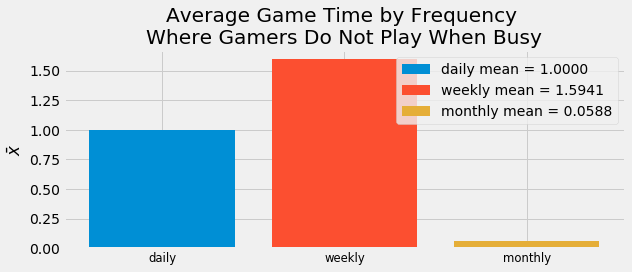

In [188]:
plt.figure(figsize=(9,4))

means = [mean_vid_daily, mean_vid_weekly, mean_vid_monthly, mean_vid_semesterly]
labels = ['daily', 'weekly', 'monthly', 'semesterly']

for i in range(4):
    if means[i]:
        plt.bar([i], 
                height=[means[i]], 
                label='{} mean = {:.4f}'.format(labels[i], means[i]), 
                log=False,)
                #yerr=[std_vid_daily, std_vid_weekly, std_vid_monthly, std_vid_semesterly])
    
plt.xticks([0,1,2,3][:3], labels[:3], size='small')
plt.ylabel(r'$\bar{x}$')
plt.title('Average Game Time by Frequency \nWhere Gamers Do Not Play When Busy')
plt.legend()

plt.tight_layout()
plt.savefig('s2-notbusy.png', dpi=420, )

plt.show()

In [189]:
video_daily_df = video_df[(video_df['freq'] == 1) & (video_df['busy'] == 1)]
mean_vid_daily = np.mean(video_daily_df['time'])
std_vid_daily = np.std(video_daily_df['time'])

video_weekly_df = video_df[(video_df['freq'] == 2) & (video_df['busy'] == 1)]
mean_vid_weekly = np.mean(video_weekly_df['time'])
std_vid_weekly = np.std(video_weekly_df['time'])

video_monthly_df = video_df[(video_df['freq'] == 3) & (video_df['busy'] == 1)]
mean_vid_monthly = np.mean(video_monthly_df['time'])
std_vid_monthly = np.std(video_monthly_df['time'])

video_semesterly_df = video_df[(video_df['freq'] == 4) & (video_df['busy'] == 1)]
mean_vid_semesterly = np.mean(video_semesterly_df['time'])
std_vid_semesterly = np.std(video_semesterly_df['time'])

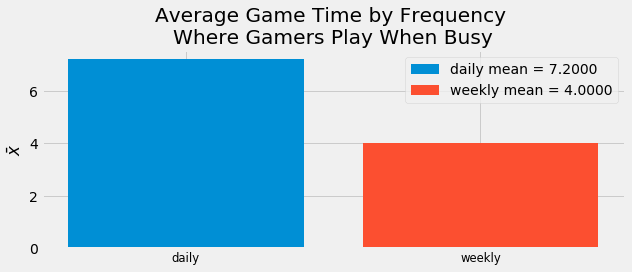

In [190]:
plt.figure(figsize=(9,4))

means = [mean_vid_daily, mean_vid_weekly, mean_vid_monthly, mean_vid_semesterly]
labels = ['daily', 'weekly', 'monthly', 'semesterly']

for i in range(2):
    if means[i]:
        plt.bar([i], 
                height=[means[i]], 
                label='{} mean = {:.4f}'.format(labels[i], means[i]), 
                log=False,)
                #yerr=[std_vid_daily, std_vid_weekly, std_vid_monthly, std_vid_semesterly])
    
plt.xticks([0,1,2,3][:2], labels[:2], size='small')
plt.ylabel(r'$\bar{x}$')
plt.title('Average Game Time by Frequency \nWhere Gamers Play When Busy')
plt.legend()

plt.tight_layout()


plt.savefig('s2-busy.png', dpi=420, )

plt.show()

In [191]:
means

[7.2, 4.0, 0.0, nan]